In [1]:
from IPython.core.display import Image, display

### Работа со Spark

In [2]:
sc

<SparkContext master=local[*] appName=PySparkShell>

 sc - объект, содержащий информацию о подключению к spark

# RDD (Resilient Distributed Dataset)

RDD - представление массива данных в spark

Пример создания RDD:


In [3]:
data = ['blue', 'orange', 'green', 'blue', 'blue', 'yellow', 'green', 'yellow', 'blue', 'orange', 'green', 'green']
rdd = sc.parallelize(data)

In [4]:
rdd

ParallelCollectionRDD[0] at parallelize at PythonRDD.scala:195

Обратное преобразование:

In [5]:
collected_data = rdd.collect()

print(collected_data)

['blue', 'orange', 'green', 'blue', 'blue', 'yellow', 'green', 'yellow', 'blue', 'orange', 'green', 'green']


## MapReduce на Spark

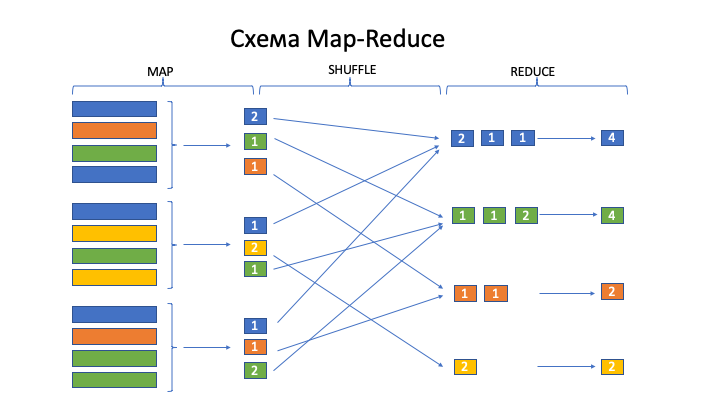

In [6]:
display(Image("Mapreduce.png"))

In [7]:
def map_func(obj):
    return (obj, 1)

def reduce_func_sum(x, y):
    return x+y

In [8]:
processed_data = rdd.map(map_func).reduceByKey(reduce_func_sum)

In [9]:
processed_data.collect()

[('orange', 2), ('green', 4), ('blue', 4), ('yellow', 2)]

In [10]:
rdd.map(map_func).collect()

[('blue', 1),
 ('orange', 1),
 ('green', 1),
 ('blue', 1),
 ('blue', 1),
 ('yellow', 1),
 ('green', 1),
 ('yellow', 1),
 ('blue', 1),
 ('orange', 1),
 ('green', 1),
 ('green', 1)]

### FlatMap

Позволяет делать соотношение не один-к-одному а один-ко-много

In [11]:
rdd = sc.parallelize(["на улице тепло", "холодно на улице"])
rdd.map(map_func).reduce(reduce_func_sum)

('на улице тепло', 1, 'холодно на улице', 1)

In [12]:
def get_words(text):
    from nltk.tokenize import RegexpTokenizer
    tokenizer = RegexpTokenizer(r"[а-яёa-z]+")
    result = []
    for word in tokenizer.tokenize(text):
        result.append((word, 1))
    return result

In [13]:
get_words('на улице тепло')

[('на', 1), ('улице', 1), ('тепло', 1)]

In [14]:
rdd = sc.parallelize(["на улице тепло", "холодно на улице"])

In [15]:
rdd.flatMap(get_words).reduceByKey(reduce_func_sum).collect()

[('холодно', 1), ('на', 2), ('улице', 2), ('тепло', 1)]

# Применим наши функции на настоящих данных:

In [16]:
data = sc.textFile("wiki_math/*").cache()


In [17]:
data.count()

1310

In [18]:
result = data.flatMap(get_words).reduceByKey(reduce_func_sum).cache()

In [19]:
result.take(10)

[('первых', 47),
 ('oq', 46),
 ('неведий', 7),
 ('ластическое', 4),
 ('elley', 1),
 ('рямолинейная', 5),
 ('упаковке', 3),
 ('ерельман', 3),
 ('возникло', 5),
 ('свести', 10)]

### Cортировка данных: 

#### По ключу:

In [20]:
result.sortByKey().take(10)

[('a', 3643),
 ('aa', 43),
 ('aaa', 3),
 ('aaaa', 1),
 ('aadi', 1),
 ('aadkd', 1),
 ('aadod', 1),
 ('aak', 1),
 ('aake', 1),
 ('aam', 1)]

#### По произвольной функции:

Сортировка происходит в обратном порядке, поэтому

In [21]:
result.sortBy(lambda x: -x[1]).take(15)

[('displaystyle', 9153),
 ('и', 7775),
 ('в', 7184),
 ('править', 6606),
 ('x', 5862),
 ('n', 4929),
 ('с', 3893),
 ('a', 3643),
 ('i', 3421),
 ('код', 3318),
 ('на', 3210),
 ('k', 2869),
 ('y', 2246),
 ('для', 2216),
 ('t', 2163)]

#### фильтрация данных

In [22]:
result.filter(lambda x: x[1] > 100).take(10)

[('beta', 248),
 ('точки', 537),
 ('a', 3643),
 ('это', 633),
 ('ock', 199),
 ('стороны', 158),
 ('римеры', 167),
 ('ли', 102),
 ('измерения', 106),
 ('varepsilon', 218)]